In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv",encoding='utf-8')

df_test = pd.read_csv("/content/drive/MyDrive/test.csv",encoding='utf-8')

In [5]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
print(df_train.shape)
print(df_test.shape)

(159571, 8)
(153164, 2)


In [8]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [9]:
print(df_train.describe())
print(df_test.describe())

           malignant  highly_malignant  ...          abuse         loathe
count  159571.000000     159571.000000  ...  159571.000000  159571.000000
mean        0.095844          0.009996  ...       0.049364       0.008805
std         0.294379          0.099477  ...       0.216627       0.093420
min         0.000000          0.000000  ...       0.000000       0.000000
25%         0.000000          0.000000  ...       0.000000       0.000000
50%         0.000000          0.000000  ...       0.000000       0.000000
75%         0.000000          0.000000  ...       0.000000       0.000000
max         1.000000          1.000000  ...       1.000000       1.000000

[8 rows x 6 columns]
                      id                    comment_text
count             153164                          153164
unique            153164                          153164
top     6bea500cec63a717  . Onu da bulurum. Kolay gelsin
freq                   1                               1


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


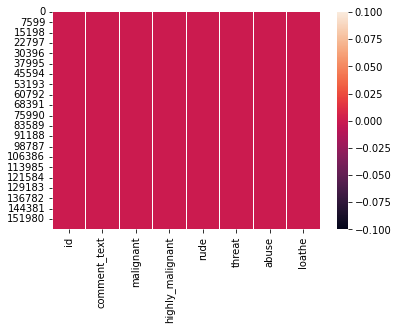

In [10]:
print(df_train.isnull().sum())
print(sns.heatmap(df_train.isnull()))

id              0
comment_text    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


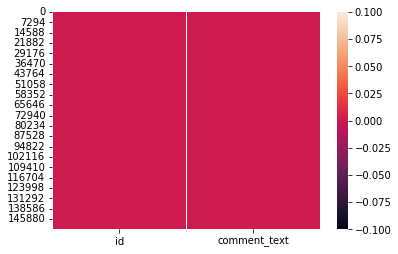

In [11]:
print(df_test.isnull().sum())
print(sns.heatmap(df_test.isnull()))

malignant
0    144277
1     15294
Name: malignant, dtype: int64


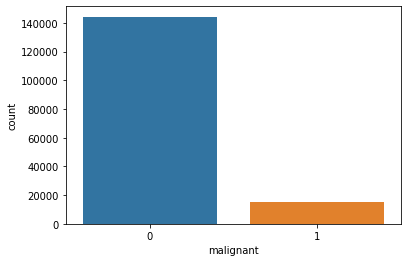

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


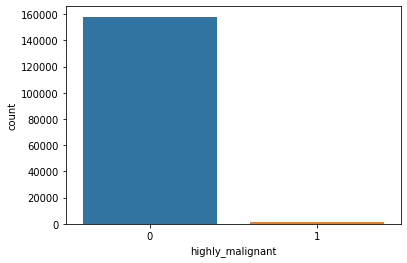

rude
0    151122
1      8449
Name: rude, dtype: int64


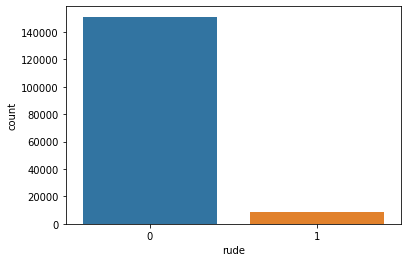

threat
0    159093
1       478
Name: threat, dtype: int64


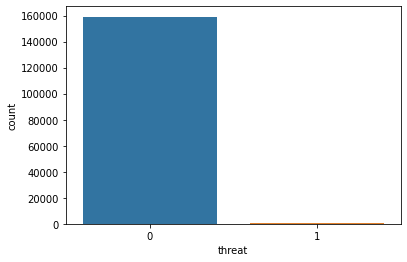

abuse
0    151694
1      7877
Name: abuse, dtype: int64


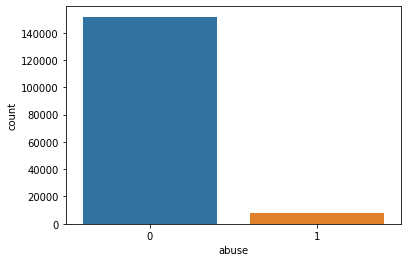

loathe
0    158166
1      1405
Name: loathe, dtype: int64


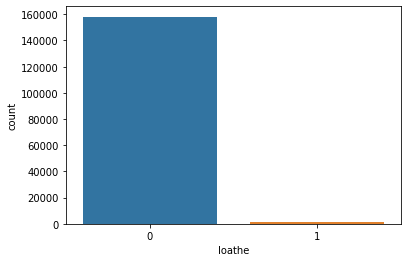

In [12]:
#checking the values counts
columns = [ 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']

for col in columns:
  print(col)
  print(df_train[col].value_counts())
  sns.countplot(df_train[col])
  plt.show()

In [13]:
#replacing email address with email
df_train['comment_text'] =df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'number'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
df_train['comment_text'] = df_train['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [14]:
#replacing email address with email
df_test['comment_text'] =df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'number'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', '')

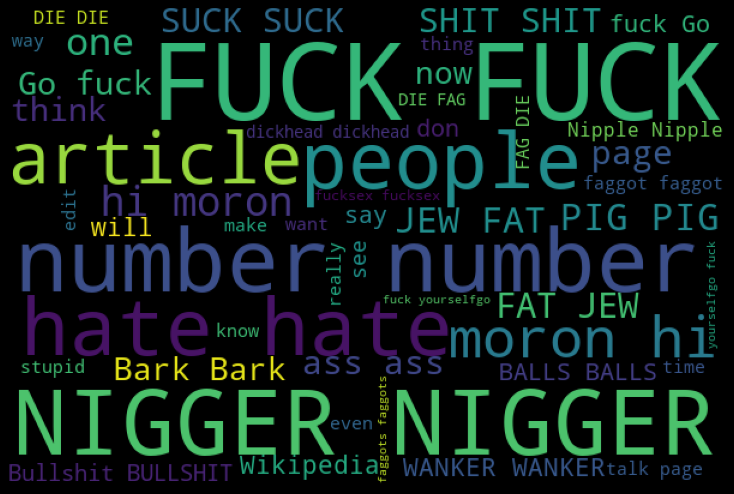

In [15]:
# checking the most offencive words
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

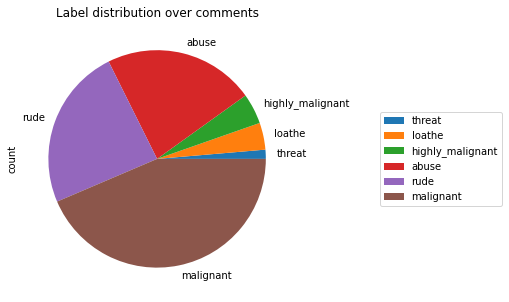

In [16]:
# checking the total distribution of commants
df_distribution = df_train[columns].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [17]:
# for i in range(len(df_train['comment_text'])):
#     df_train['comment_text'][i] = df_train['comment_text'][i].lower()
#     j = []
#     for word in df_train['comment_text'][i].split():
#         j.append(lemmatizer.lemmatize(word, pos="v"))
#         df_train['comment_text'][i] = "".join(j)

In [18]:
# for i in range(len(df_test['comment_text'])):
#     df_test['comment_text'][i] = df_test['comment_text'][i].lower()
#     j = []
#     for word in df_test['comment_text'][i].split():
#         j.append(lemmatizer.lemmatize(word, pos="v"))
#         df_test['comment_text'][i] = "".join(j)

In [21]:
import nltk
# nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
!pip install wordnet

  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10520 sha256=d72ffa6e776ecacf11b557ae296f203a3a1d4fa59a240614d99c9362b93ca0c2
  Stored in directory: /root/.cache/pip/wheels/8c/6d/01/fbf1762cd6428569ea48474660f9cfe029307cd6c0f2abcdec
Successfully built wordnet


In [35]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [36]:
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [37]:
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [39]:
#  Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
X_features = tf_vec.fit_transform(df_train['comment_text'])
X = X_features

In [40]:
y = df_train['malignant']

In [45]:
x_train,x_test,y_train,y_test=train_test_split( X,y,random_state=56,test_size=.30)

In [46]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988451105202374
Test accuracy is 0.9555899064171123
[[42695   552]
 [ 1574  3051]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43247
           1       0.85      0.66      0.74      4625

    accuracy                           0.96     47872
   macro avg       0.91      0.82      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [47]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988809210467416
Test accuracy is 0.9396933489304813
[[41867  1380]
 [ 1507  3118]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43247
           1       0.69      0.67      0.68      4625

    accuracy                           0.94     47872
   macro avg       0.83      0.82      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [50]:
# MultinomialNBClassifiear
MN = MultinomialNB()

MN.fit(x_train, y_train)
y_pred_train = MN.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = MN.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9514588313234675
Test accuracy is 0.9488218582887701
[[43079   168]
 [ 2282  2343]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43247
           1       0.93      0.51      0.66      4625

    accuracy                           0.95     47872
   macro avg       0.94      0.75      0.81     47872
weighted avg       0.95      0.95      0.94     47872



In [49]:
# GradientBoostingClassifier
GBC = GradientBoostingClassifier()

GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = GBC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988809210467416
Test accuracy is 0.9396933489304813
[[41867  1380]
 [ 1507  3118]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43247
           1       0.69      0.67      0.68      4625

    accuracy                           0.94     47872
   macro avg       0.83      0.82      0.83     47872
weighted avg       0.94      0.94      0.94     47872



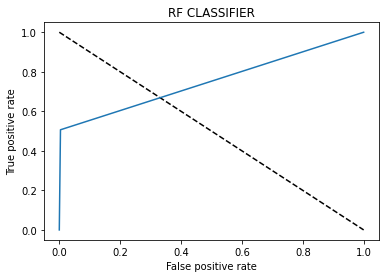

In [51]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [54]:
df_test =tf_vec.fit_transform(df_test['comment_text'])
df_test

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2815312 stored elements in Compressed Sparse Row format>

In [55]:
prediction=RF.predict(df_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
import joblib
joblib.dump(RF,"maligant_commant.pkl")

['maligant_commant.pkl']